## Table of contents
 1. Import libraries and Data
 2. Data Checks
 3. Addressing any PII data
 4. Create region flag from state
    
    4b. spending/ordering habits between the different U.S. regions
  
    4C. Visualization for spending and ordering habits between the           different U.S. regions
    
    4d. Exporting Visualization for spending and ordering/region
   
 
 5. Creating an Exclusion flag for low-activity customer(<5 orders)
 6. Customer profiling
 7. Visualization to show distribution of profiles
    
    7b. Exporting visualization for customers profiles distribution
 
 
 8. Aggregate the max, mean, and min variables on a customer-  profile level for usage frequency and expenditure.
 9. Compare customer profiles with regions and departments 
 10. Other suitable charts.
    
     10a. customers'profile to frequency of order
     
     10b. Frequency of product orders visualization
     
     10c. Customers' loyalty and spender visualization
     
     10d. Exporting visuals and final datasets
      

### 1. Import libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path folder as 'path'
path = r'C:\Users\mojis\Documents\09-2022-Instacart Basket Analysis(Task 4 careerfoundary)'

In [3]:
# import merged version dataframe
ords_prods_cus = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data(cleaned)','orders_products_customers.pkl'))

### 2. Data Checks

In [4]:
# checking dimension
ords_prods_cus.shape

(32404859, 33)

In [5]:
# checking the first few rows and columns
ords_prods_cus.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [6]:
ords_prods_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     int64   
 1   product_name                   object  
 2   aisle_id                       int64   
 3   department_id                  int64   
 4   prices                         float64 
 5   order_id                       int64   
 6   user_id                        object  
 7   order_number                   int64   
 8   orders_day_of_week             int64   
 9   order_hour_of_day              int64   
 10  days_since_prior_order         float64 
 11  add_to_cart_order              int64   
 12  reordered                      int64   
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  Busiest_days                   object  
 17  Busiest_period_of_day    

### 3. Addressing any PII data(Personal Identifiable information) for security purpose

In [7]:
# use drop function to drop first_name & last_name columns
ords_prods_cus.drop(['first_name','last_name'], inplace=True, axis =1)

In [8]:
# checking new dimension
ords_prods_cus.shape

(32404859, 31)

###### first and last name colunms have been successfully removed

####  4. using crosstab to confirm hypothesis(Missing values from days_since prior_order fall where order number is equal to 1

In [9]:
#creating crosstab for days_since_prior_order & order_number
crosstab = pd.crosstab(ords_prods_cus['days_since_prior_order'], ords_prods_cus['order_number'], dropna = False)

In [10]:
#Copying result to clipboard
crosstab.to_clipboard()


### 4. Create region flag from state

In [11]:
# checking state column frequency
ords_prods_cus['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [12]:
# using loc function to categorize state in Northeast region
ords_prods_cus.loc[ords_prods_cus['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']),'region'] = 'Northeast Region'

In [13]:
# using loc function to categorize state in Midwest region
ords_prods_cus.loc[ords_prods_cus['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
          'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
          'Minnesota', 'Iowa', 'Missouri']),'region'] = 'Midwest Region'

In [14]:
# using loc function to categorize state in South region
ords_prods_cus.loc[ords_prods_cus['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
         'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee',
         'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']),'region'] = 'South Region'

In [15]:
# using loc function to categorize state in Northeast region
ords_prods_cus.loc[ords_prods_cus['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
        'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']),'region'] = 'West Region'

In [16]:
# Checking frequency for Region column
ords_prods_cus['region'].value_counts(dropna = False)

South Region        10791885
West Region          8292913
Midwest Region       7597325
Northeast Region     5722736
Name: region, dtype: int64

In [17]:
#checking to see if all region records match dataframe
10791885+8292913+7597325+5722736

32404859

### 4b. spending/ordering habits between the different U.S. regions

In [18]:
# firstly, checking no of states for each region as it could influence the no of orders/spending in a regionords_prods_cus[['region','state']].groupby('region').agg({'state': pd.Series.nunique,}).sort_values(by='state',

ords_prods_cus[['region','state']].groupby('region').agg({'state': pd.Series.nunique,}).sort_values(by='state',
                                                                                          ascending=False)                                                                           

,state
region,
South Region,17
West Region,13
Midwest Region,12
Northeast Region,9


###### South region has the most states while Northeast region has the least states

In [19]:
# Using crosstab to check the frequency of low and high spender to region
crosstab_2 = pd.crosstab(ords_prods_cus['region'], ords_prods_cus['spender_flag'], dropna = False).sort_index()
crosstab_2

spender_flag,High spender,Low spender
region,,
Midwest Region,155975,7441350
Northeast Region,108225,5614511
South Region,209691,10582194
West Region,160354,8132559


###### Southeast region has the highest low and high spender while Northeast region has the least of both spender.
###### Number of states to each region has influences in no of spender as region with more states will have more customers due to more population

In [20]:
# Using crosstab to check order_frequency of customers to region
crosstab_3 = pd.crosstab(ords_prods_cus['region'], ords_prods_cus['order_frequency_flag'], dropna = False).sort_index()
crosstab_3

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest Region,5017709,863419,1716197
Northeast Region,3804566,630182,1287988
South Region,7192372,1215088,2384420
West Region,5545206,927748,1819959


###### South region has the highest frequent customer while Northeast has the least

In [21]:
# using crosstab to check loyalty_flag to region
crosstab_4 = pd.crosstab(ords_prods_cus['region'], ords_prods_cus['loyalty_flag'], dropna = False).sort_index()
crosstab_4

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest Region,2373774,1472573,3750978
Northeast Region,1841785,1100207,2780744
South Region,3405844,2074410,5311631
West Region,2662690,1596800,4033423


###### South region has highest loyal customers while North east region has the least

In [22]:
# creating new df that Summarizes user_id,prices,& order_number by region using agg function
df_region = ords_prods_cus[['prices', 'region', 'user_id', 'order_number']].groupby(['region']).agg(
    {'prices':'sum', 'user_id': pd.Series.nunique, 'order_number':'sum'})
df_region = df_region.rename(columns={'prices':'Prices_total', 'user_id': 'Customer_count', 'order_number': 'Total_no_of_order'})
df_region

,Prices_total,Customer_count,Total_no_of_order
region,,,
Midwest Region,59192977.7,48519,128585728
Northeast Region,44530105.8,36388,98521079
South Region,84107910.4,68737,185091277
West Region,64595126.7,52565,143295881


###### South region has the highest total price spent, highest number of customer and highest total number of orders, while Northeast region has the least

#### 4C. Visualization for spending and ordering habits between the different U.S. regions

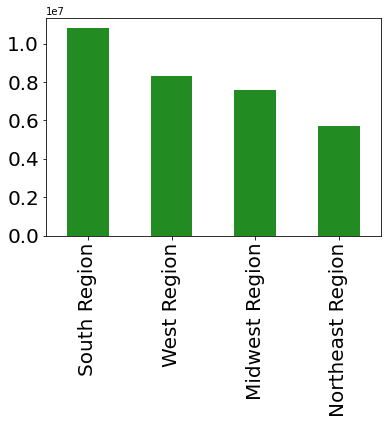

In [23]:
#regional distribution of customers
bar_region=ords_prods_cus['region'].value_counts().plot.bar(color='forestgreen', fontsize=20)

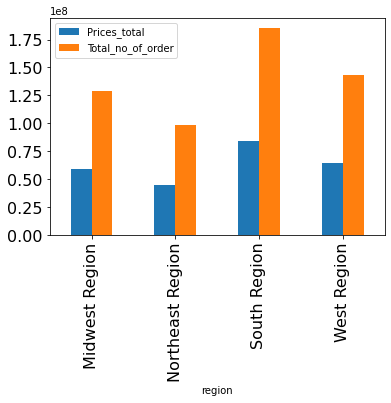

In [24]:
# Regional distribution of total price spent and total number of order
df_region_bar=df_region[['Prices_total','Total_no_of_order']].plot(kind='bar',fontsize =16)

### 4d. Exporting Visualization for spending and ordering/region

In [25]:
# Export bar_region
bar_region.figure.savefig(os.path.join(path, '04 Analysis','visualizations','bar_region.png'))

In [26]:
# Export df_region_bar
df_region_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','region_prices_order_bar.png'))

### 5. Creating an Exclusion flag for low-activity customer(< 5 orders)

In [27]:
#first step is to Aggregate.
# Aggregating user_id using count and grouping them by user_id
ords_prods_cus['total_order'] = ords_prods_cus.groupby(['user_id'])['user_id'].transform('count')

In [28]:
# using if statement with For loop function
# Looping the new column(total_orders) by categorizing it
result = []

for value in ords_prods_cus["total_order"]:
  if value < 5:
    result.append("Low-Activity")
  else:
    result.append("Regular Activity")

In [29]:
#Creating a new column 'activity_flag' in dataframe = result
ords_prods_cus['activity_flag']= result

In [30]:
# checking frequency of activity_flag to see how many customers with low_activity
ords_prods_cus['activity_flag'].value_counts(dropna = False)

Regular Activity    32401975
Low-Activity            2884
Name: activity_flag, dtype: int64

In [31]:
#Creating a subset of low activity customers
low_activity_customers= ords_prods_cus[ords_prods_cus['activity_flag']=='Low-Activity']

In [32]:
# check low activity customer datafram
low_activity_customers.shape

(2884, 34)

In [33]:
# Exporting low activity customers dataframe
low_activity_customers.to_csv(os.path.join(path, '02 Data','Prepared Data(cleaned)','low_activity_customers.csv'))

In [34]:
# Excluding Low-Activity from data whole dataframe
ords_prods_cus.drop(ords_prods_cus[ords_prods_cus['activity_flag']=='Low-Activity'].index, inplace=True)

In [35]:
#Checking dimension of dataframe to see if Low-Activity customers was excluded
ords_prods_cus.shape

(32401975, 34)

### 6. Customer profiling

###  6a. Age group flag
#### conditions for Age grouping:
- age >=18 and < =24  = Young dult                                      
- age >24 and <=64  = Adult                                              
- age > 64 = Seniors

In [36]:
#creating age_group_flag
#create young adults flag: age 18-24
ords_prods_cus.loc[(ords_prods_cus['age'] >= 18) & (ords_prods_cus['age'] <= 24), 'age_group'] = 'Young adult'
#adults flag: age 25-64
ords_prods_cus.loc[(ords_prods_cus['age'] > 24) & (ords_prods_cus['age'] <=64), 'age_group'] = 'Adult' 
#seniors flag: age 65 and over
ords_prods_cus.loc[ords_prods_cus['age'] >=65, 'age_group'] = 'Senior'

In [37]:
# Check age_group frequency
ords_prods_cus['age_group'].value_counts(dropna = False)

Adult          20254986
Senior          8574323
Young adult     3572666
Name: age_group, dtype: int64

### 6b. income_flag
#### Conditions for income_flag
 - Income <= 50,000 is label Low Income
 - Income > 50,000 and <= 150,000 is label middle income
 - Income > 150 is label High Income

In [38]:
#creating income_flag
#create flag for Low_Income
ords_prods_cus.loc[ords_prods_cus['income'] <= 50000, 'income_flag'] = 'Low Income'
#Create flag for Middle Income
ords_prods_cus.loc[(ords_prods_cus['income'] > 50000) & (ords_prods_cus['income'] <= 150000), 'income_flag'] = 'Middle Income' 
#Create flag for High Income
ords_prods_cus.loc[ords_prods_cus['income'] > 150000, 'income_flag'] = 'High Income'

In [39]:
# Check income_flag frequency
ords_prods_cus['income_flag'].value_counts(dropna = False)

Middle Income    24758328
High Income       4050657
Low Income        3592990
Name: income_flag, dtype: int64

### 6c. dependents_flag
#### Condition for dependents_flag
 - Customers with no_of_dependents = 0 is label 'No dependent
 - Customers with no_of_dependents > 0 is label 'With dependents


In [40]:
#creating dependents_flag
#create flag for customers with no dependent
ords_prods_cus.loc[ords_prods_cus['no_of_dependents'] == 0, 'dependents_flag'] = 'No dependent'
#create flag for customers with dependents
ords_prods_cus.loc[ords_prods_cus['no_of_dependents'] > 0, 'dependents_flag'] = 'With dependents'

In [41]:
# Check dependents_flag frequency
ords_prods_cus['dependents_flag'].value_counts(dropna = False)

With dependents    24305226
No dependent        8096749
Name: dependents_flag, dtype: int64

### 6d. Flag for certain goods in department column
- profile would be made based on babies department


In [42]:
# import department dataframe
dep=pd.read_csv(os.path.join(path, '02 Data','Prepared Data(cleaned)', 'departments_wrangled.csv'),index_col=False)

In [43]:
# Create data dictionary for department id
zipped=zip(dep['Unnamed: 0'], dep['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [44]:
# map department names to department id in dataframe
ords_prods_cus['department'] = ords_prods_cus['department_id'].map(data_dict)
ords_prods_cus.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,no_of_dependents,marital_status,income,region,total_order,activity_flag,age_group,income_flag,dependents_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,Midwest Region,148,Regular Activity,Senior,Low Income,With dependents,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,Midwest Region,148,Regular Activity,Senior,Low Income,With dependents,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,1,married,49620,Midwest Region,148,Regular Activity,Senior,Low Income,With dependents,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,1,married,49620,Midwest Region,148,Regular Activity,Senior,Low Income,With dependents,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,1,married,49620,Midwest Region,148,Regular Activity,Senior,Low Income,With dependents,bulk


   ######  created a subset for customers who bought babies producs as 'parents'.

In [45]:
# Create subset for customers who have purchased babies products
parents=ords_prods_cus.loc[ords_prods_cus['department']=='babies']

In [46]:
# checking colums and few rows
parents.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,no_of_dependents,marital_status,income,region,total_order,activity_flag,age_group,income_flag,dependents_flag,department
8279,9356,Swaddlers Size 2 Diapers,56,18,12.1,984114,15954,5,0,20,...,2,married,149863,Midwest Region,68,Regular Activity,Adult,Middle Income,With dependents,babies
21728,6042,No More Tangles Leave-in Conditioner,102,18,4.2,2360653,39145,5,0,17,...,1,married,47143,South Region,215,Regular Activity,Adult,Low Income,With dependents,babies
26834,18334,Baby Oil,102,18,9.4,3011132,50640,5,6,6,...,0,single,84195,West Region,311,Regular Activity,Young adult,Middle Income,No dependent,babies
26835,18334,Baby Oil,102,18,9.4,1234307,50640,14,3,13,...,0,single,84195,West Region,311,Regular Activity,Young adult,Middle Income,No dependent,babies
26836,18334,Baby Oil,102,18,9.4,379257,50640,24,0,13,...,0,single,84195,West Region,311,Regular Activity,Young adult,Middle Income,No dependent,babies


 ######  created a subset for customers who bought international products as 'immigrant'

In [47]:
# Create subset for customers who have purchased international products
Immigrants=ords_prods_cus.loc[ords_prods_cus['department']=='international']

In [48]:
# check columns and first few row
Immigrants.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,no_of_dependents,marital_status,income,region,total_order,activity_flag,age_group,income_flag,dependents_flag,department
213,13496,Tofu Shirataki,66,6,2.3,1331431,709,3,6,15,...,2,married,158302,Northeast Region,192,Regular Activity,Senior,High Income,With dependents,international
1468,5913,Lite Coconut Milk,66,6,1.4,2978890,2850,10,1,11,...,1,married,46105,West Region,301,Regular Activity,Young adult,Low Income,With dependents,international
1597,27528,Nacho Cheese Taco Shells,30,6,6.1,1149125,2850,14,1,13,...,1,married,46105,West Region,301,Regular Activity,Young adult,Low Income,With dependents,international
1730,46217,Sriracha Peas,66,6,2.0,1482338,2850,7,1,16,...,1,married,46105,West Region,301,Regular Activity,Young adult,Low Income,With dependents,international
1731,46217,Sriracha Peas,66,6,2.0,2525984,2850,11,6,7,...,1,married,46105,West Region,301,Regular Activity,Young adult,Low Income,With dependents,international


### 7. Visualization to show distribution of profiles

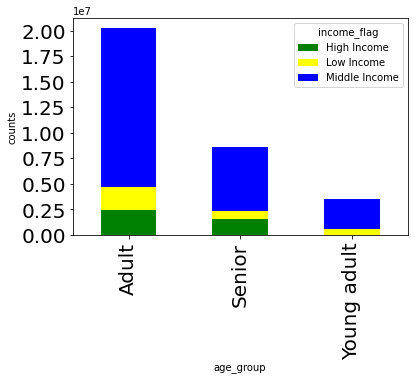

In [49]:
#bar chart for age groups and income groups
age_income_bar=ords_prods_cus.groupby('age_group')['income_flag'].value_counts().unstack().plot.bar(stacked=True,
                                                    ylabel='counts',color=['green','yellow','blue'], fontsize=20)

###### adult which are customers of age 25 to 64 have the highest of all income categories

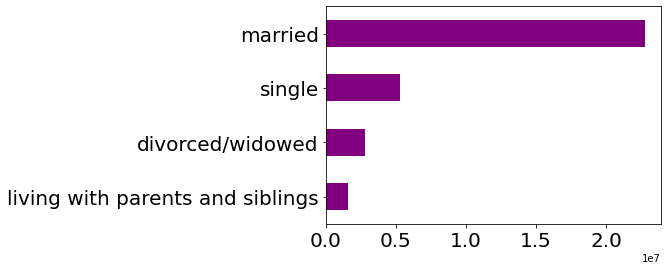

In [50]:
# Marital_status distribution of customers
marital_bar=ords_prods_cus['marital_status'].value_counts().sort_values().plot.barh(color='purple', fontsize=20)

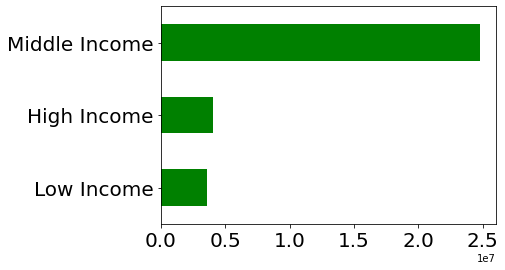

In [51]:
#income status distribution of customers
income_bar=ords_prods_cus['income_flag'].value_counts().sort_values().plot.barh(color='green', fontsize=20)

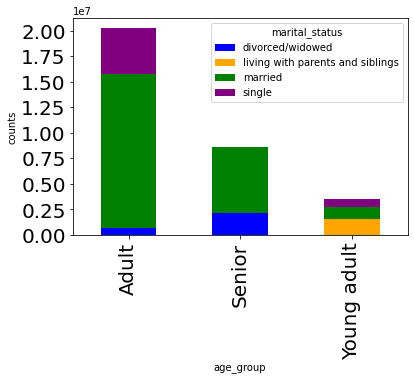

In [52]:
#bar chart for age groups and marital_status groups of customers
age_marital_bar=ords_prods_cus.groupby('age_group')['marital_status'].value_counts().unstack().plot.bar(stacked=True,
                                                    ylabel='counts',color=['blue','orange','green','purple'], fontsize=20)

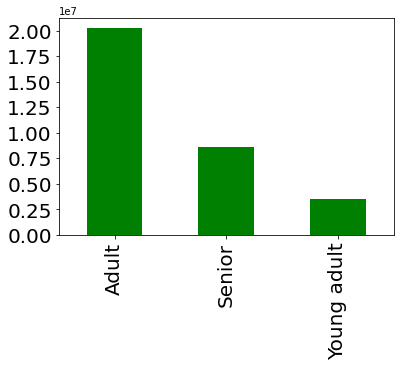

In [53]:
#age_group distribution of customers
age_bar=ords_prods_cus['age_group'].value_counts().plot.bar(color='green', fontsize=20)

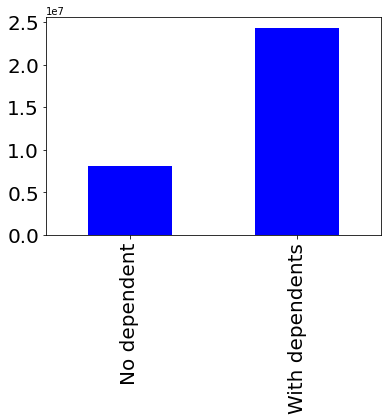

In [54]:
# dependents distribution of customers
Dependents_bar=ords_prods_cus['dependents_flag'].value_counts().sort_values().plot.bar(color='blue', fontsize=20)

#### 7b. Exporting visualization for customers profiles distribution

In [55]:
# Export age_income_bar
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','age_income_bar.png'))

# Export marital_bar
marital_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','marital_bar.png'))

# Export df_region_bar
income_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','income_bar.png'))

# Export age_marital_bar
age_marital_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','age_marital_bar.png'))

# Export age_bar
age_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','age_bar.png'))

# Export df_region_bar
Dependents_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','dependents_bar.png'))

### 8. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### 8a. age_group aggregation for usage frequency & expenditure

In [56]:
#aggregating for age group expenditure
ords_prods_cus.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.788711  1.0  25.0
Senior       7.796590  1.0  25.0
Young adult  7.790922  1.0  25.0

###### all age group has same average,minimum & maximum prices spent

In [57]:
#aggregating for age group order frequency
ords_prods_cus.groupby('age_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
age_group                                           
Adult                           10.418793  0.0  30.0
Senior                          10.361466  0.0  30.0
Young adult                     10.356916  0.0  30.0

#### 8b. income_flag aggregation for usage frequency & expenditure

In [58]:
#aggregating for income_flag expenditure
ords_prods_cus.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_flag                       
High Income    7.946939  1.0  25.0
Low Income     6.697611  1.0  25.0
Middle Income  7.924245  1.0  25.0

In [59]:
#aggregating for income_flag order frequency
ords_prods_cus.groupby('income_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                       mean  min   max
income_flag                                           
High Income                       10.175068  0.0  30.0
Low Income                        11.119970  0.0  30.0
Middle Income                     10.328130  0.0  30.0

#### 8c. marital_status aggregation for usage frequency & expenditure

In [60]:
#aggregating for marital_status expenditure
ords_prods_cus.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.801018  1.0  25.0
living with parents and siblings  7.800799  1.0  25.0
married                           7.790743  1.0  25.0
single                            7.784273  1.0  25.0

In [61]:
#aggregating for marital_status order frequency
ords_prods_cus.groupby('marital_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                                          mean  min   max
marital_status                                                           
divorced/widowed                                     10.314168  0.0  30.0
living with parents and siblings                     10.322765  0.0  30.0
married                                              10.412608  0.0  30.0
single                                               10.393819  0.0  30.0

##### 8d. dependents_flag aggregation for usage frequency & expenditure

In [62]:
#aggregating for dependents_flag expenditure
ords_prods_cus.groupby('dependents_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
dependents_flag                     
No dependent     7.790005  1.0  25.0
With dependents  7.791384  1.0  25.0

In [63]:
#aggregating for marital_status order frequency
ords_prods_cus.groupby('dependents_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                         mean  min   max
dependents_flag                                         
No dependent                        10.366554  0.0  30.0
With dependents                     10.406877  0.0  30.0

#### 8e.department(those who bought babies products & international) aggregation for expenditure

In [64]:
#aggregating for department expenditure (bought babies products)
parents.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
department                     
babies      7.638374  1.0  15.0

In [65]:
#aggregating for department expenditure (bought international products)
Immigrants.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
department                        
international  7.682301  1.0  15.0

### 9. Compare customer profiles with regions and departments

#### 9a. Distribution of age_group across region and departments

In [66]:
# 100% stacked bar chart for regional age distribution 
#create crosstab for region and age group

age_region = pd.crosstab(index=ords_prods_cus['region'], columns=ords_prods_cus['age_group'], normalize="index")

#creating cross tab to display labels

age_region_labels = pd.crosstab(index=ords_prods_cus['region'],columns=ords_prods_cus['age_group'])

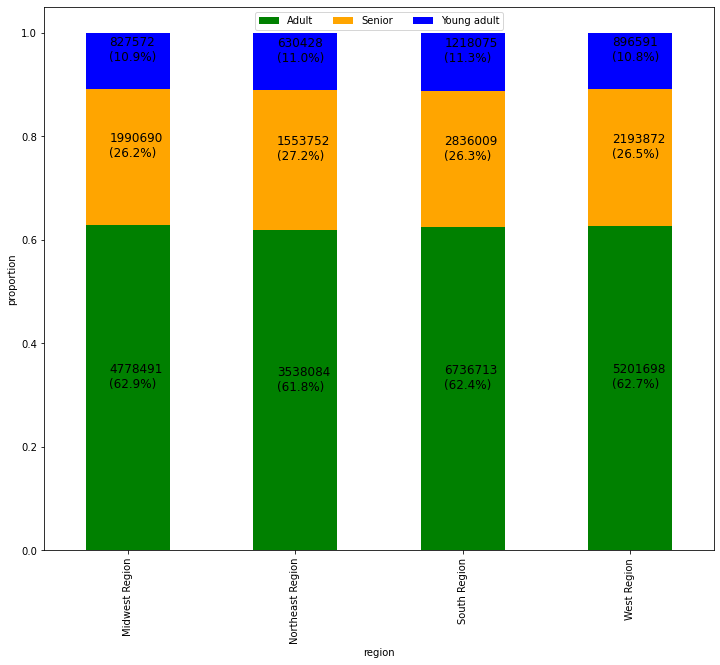

In [67]:
#plotting chart
age_regional_chart=age_region.plot(kind='bar', 
                        stacked=True, 
                        color=['green','orange','blue'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*age_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_region.loc[y],
                                         age_region_labels.loc[y],
                                          age_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [68]:
# create a table to compare age group and deparment
#table showing the proportion of products bought in each department for each age group
age_dep_cross=pd.crosstab(ords_prods_cus['age_group'], ords_prods_cus['department'], normalize='index', dropna = False)
age_dep_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Adult,0.004743,0.013180,0.036216,0.082984,0.021734,0.001059,0.032966,0.166640,0.032508,0.026711,...,0.022731,0.008314,0.021716,0.002126,0.001124,0.057831,0.013879,0.002938,0.292374,0.089376
Senior,0.004550,0.012764,0.036097,0.083344,0.021440,0.001078,0.032939,0.166324,0.032376,0.026699,...,0.022961,0.008254,0.022172,0.002110,0.001099,0.057957,0.013690,0.003066,0.293159,0.088689
Young adult,0.005192,0.013264,0.036192,0.081712,0.022093,0.001084,0.032986,0.167096,0.032229,0.027052,...,0.022726,0.008417,0.022089,0.002236,0.001148,0.057913,0.013716,0.003338,0.291968,0.088597


In [69]:
# copy
age_dep_cross.to_clipboard()

#### 9b Distribution of income across region and department

In [70]:
# 100% stacked bar chart for income distribution 
#create crosstab for region and income_flag

income_region = pd.crosstab(index=ords_prods_cus['region'], columns=ords_prods_cus['income_flag'], normalize="index")

#creating cross tab to display labels

income_region_labels = pd.crosstab(index=ords_prods_cus['region'],columns=ords_prods_cus['income_flag'])

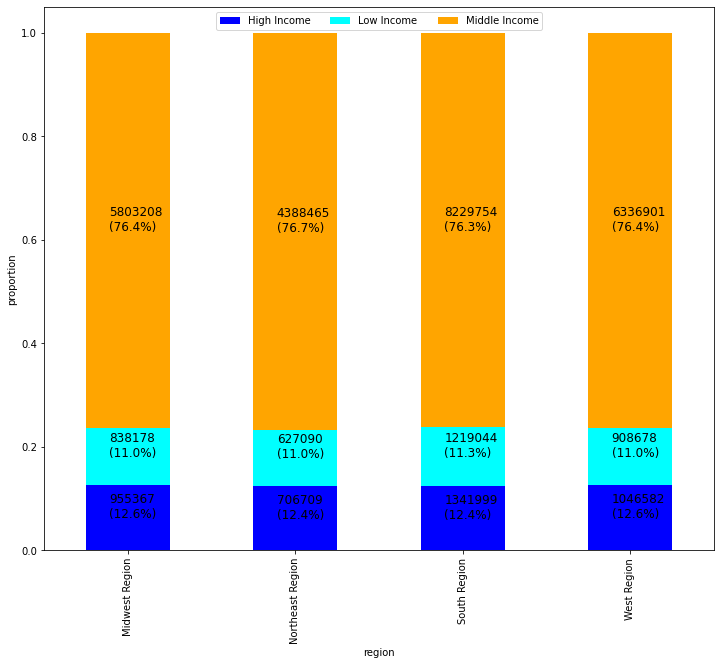

In [71]:
#plotting chart
income_regional_chart=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['blue','cyan','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [72]:
# create a table to compare income_flag and deparment
#table showing the proportion of products in each department for each customers's income category
income_dep_cross=pd.crosstab(ords_prods_cus['income_flag'], ords_prods_cus['department'], normalize='index', dropna = False)
income_dep_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_flag,,,,,,,,,,,,,,,,,,,,,
High Income,0.006159,0.013436,0.038028,0.080250,0.021440,0.000931,0.034248,0.168912,0.032339,0.027464,...,0.023889,0.008463,0.023630,0.002157,0.001172,0.059808,0.013836,0.003336,0.291083,0.07825
Low Income,0.005510,0.008588,0.031920,0.112774,0.027094,0.001360,0.024111,0.148885,0.031750,0.019658,...,0.026197,0.006523,0.010314,0.002015,0.001163,0.049926,0.014397,0.002590,0.245460,0.16480
Middle Income,0.004398,0.013672,0.036498,0.079049,0.020954,0.001047,0.034035,0.168802,0.032560,0.027656,...,0.022118,0.008544,0.023269,0.002147,0.001105,0.058711,0.013722,0.003025,0.299606,0.07990


In [73]:
# copy to clipboard
income_dep_cross.to_clipboard()

#### 9c. Distribution of marital_status across region and department

In [74]:
# 100% stacked bar chart for marital_status distribution 
#create crosstab for region and marital_status

marital_region = pd.crosstab(index=ords_prods_cus['region'], columns=ords_prods_cus['marital_status'], normalize="index")

#creating cross tab to display labels

marital_region_labels = pd.crosstab(index=ords_prods_cus['region'],columns=ords_prods_cus['marital_status'])

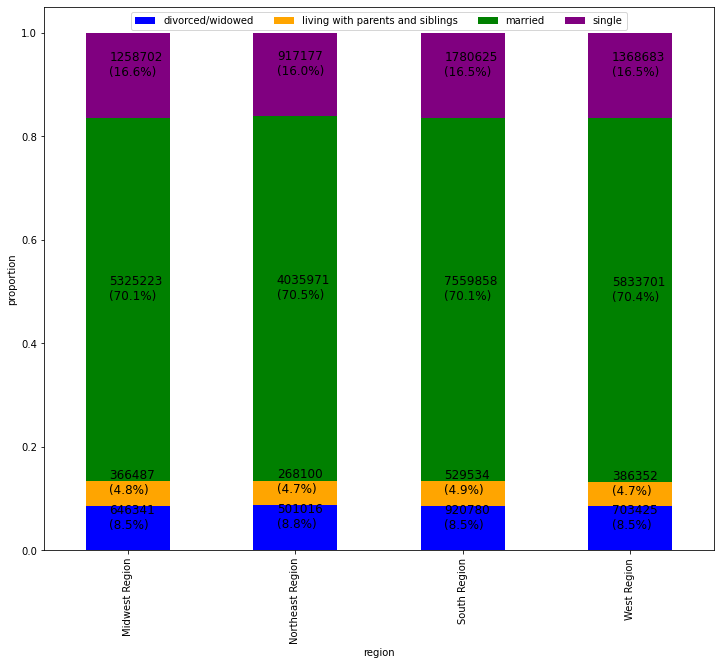

In [75]:
#plotting chart
marital_regional_chart=marital_region.plot(kind='bar', 
                        stacked=True, 
                        color=['blue','orange','green','purple'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*marital_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(marital_region.loc[y],
                                         marital_region_labels.loc[y],
                                          marital_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [76]:
# create a table to compare marital status of customers and deparment
#table showing the proportion of products in each department for each customers's marital status
marital_dep_cross=pd.crosstab(ords_prods_cus['marital_status'], ords_prods_cus['department'], normalize='index', dropna = False)
marital_dep_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
marital_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,0.004548,0.012746,0.036223,0.083332,0.021466,0.000997,0.032205,0.166648,0.032766,0.026778,...,0.022295,0.008320,0.021821,0.001982,0.001082,0.057714,0.013903,0.003034,0.293264,0.089038
living with parents and siblings,0.005736,0.012993,0.036208,0.080361,0.022400,0.001080,0.033016,0.168189,0.032513,0.026895,...,0.022712,0.008432,0.021916,0.002303,0.001233,0.058217,0.013744,0.003625,0.289975,0.088459
married,0.004643,0.013059,0.036117,0.082995,0.021696,0.001082,0.033048,0.166487,0.032329,0.026792,...,0.022964,0.008282,0.022010,0.002131,0.001107,0.057933,0.013808,0.002967,0.292415,0.089186
single,0.004974,0.013364,0.036430,0.083243,0.021609,0.001035,0.032969,0.166638,0.032736,0.026485,...,0.022336,0.008385,0.021331,0.002177,0.001159,0.057603,0.013793,0.003037,0.293424,0.089002


In [77]:
marital_dep_cross.to_clipboard()

#### 9d. Distribution of dependents_flag across region and department

In [78]:
# 100% stacked bar chart for dependents_flag distribution 
#create crosstab for region and dependents_flag

dependents_region = pd.crosstab(index=ords_prods_cus['region'], columns=ords_prods_cus['dependents_flag'], normalize="index")

#creating cross tab to display labels

dependents_region_labels = pd.crosstab(index=ords_prods_cus['region'],columns=ords_prods_cus['dependents_flag'])

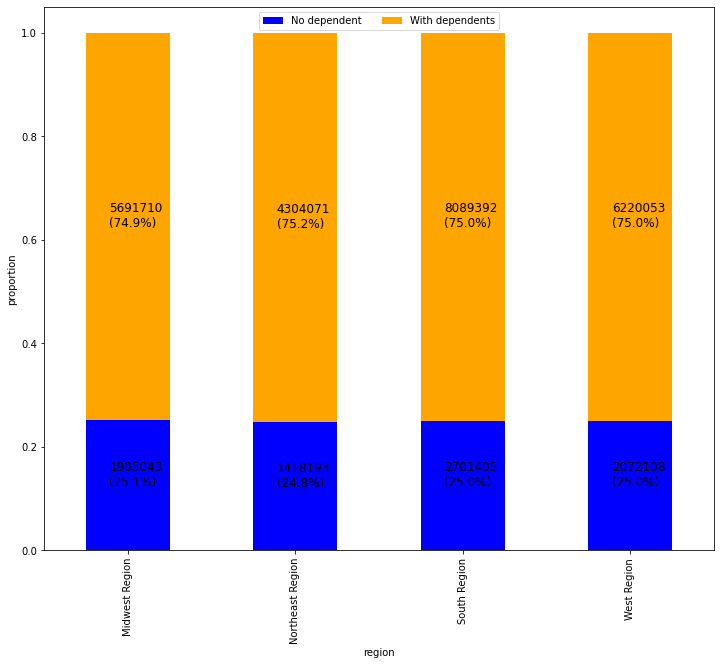

In [79]:
#plotting chart
dependents_regional_chart=dependents_region.plot(kind='bar', 
                        stacked=True, 
                        color=['blue','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*dependents_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(dependents_region.loc[y],
                                         dependents_region_labels.loc[y],
                                          dependents_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [80]:
# create a table to compare dependents_flag and deparment
#table showing the proportion of products in each department for dependents_flag
dependents_dep_cross=pd.crosstab(ords_prods_cus['dependents_flag'], ords_prods_cus['department'], normalize='index', dropna = False)
dependents_dep_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dependents_flag,,,,,,,,,,,,,,,,,,,,,
No dependent,0.004828,0.013152,0.036359,0.083274,0.021560,0.001022,0.032707,0.166641,0.032746,0.026586,...,0.022322,0.008363,0.021499,0.002110,0.001133,0.057641,0.013831,0.003036,0.293369,0.089015
With dependents,0.004713,0.013055,0.036123,0.082827,0.021741,0.001082,0.033046,0.166595,0.032341,0.026799,...,0.022948,0.008292,0.022004,0.002142,0.001115,0.057951,0.013804,0.003009,0.292259,0.089140


In [81]:
dependents_dep_cross.to_clipboard()

### 9e. distribution of babies and international goods across US region

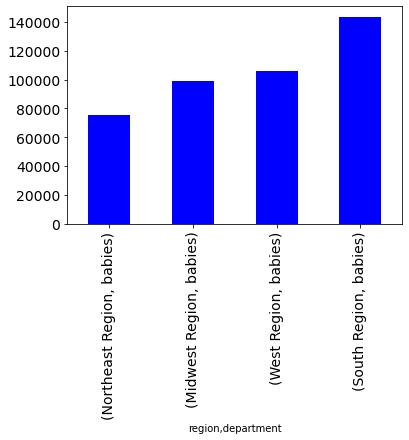

In [82]:
# Bar chart of babies goods distribution across US region
babies_bar=parents.groupby('region')['department'].value_counts().sort_values().plot.bar(color=['blue'],
                                                                           fontsize=14)

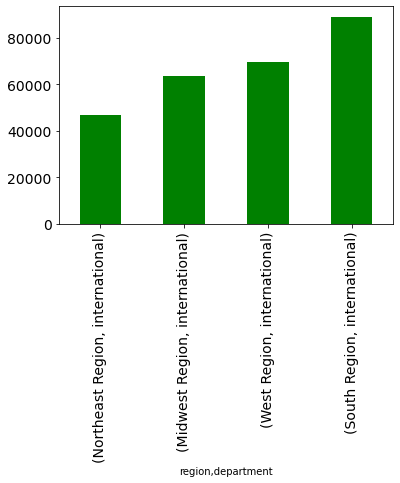

In [83]:
# Bar chart of international goods distribution across US region
international_bar=Immigrants.groupby('region')['department'].value_counts().sort_values().plot.bar(color=['green'],
                                                                           fontsize=14)

### 9f. Exporting customers profiles and region visualization

In [84]:
# Export age_regional_chart
age_regional_chart.figure.savefig(os.path.join(path, '04 Analysis','visualizations','age_regional_chart.png'))

# Export income_regional_chart
income_regional_chart.figure.savefig(os.path.join(path, '04 Analysis','visualizations','income_regional_chart.png'))

# Export marital_regional_chart
marital_regional_chart.figure.savefig(os.path.join(path, '04 Analysis','visualizations','marital_regional_chart.png'))

# Export dependents_regional_chart
dependents_regional_chart.figure.savefig(os.path.join(path, '04 Analysis','visualizations','dependents_regional_chart.png'))

# Export babies_bar
babies_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','babies_bar.png'))

# Export international_bar
international_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','international_bar.png'))

### 10. Other suitable charts.

#### 10a. customers'profile to frequency of order
###### chart distribution of Age group to frequency of order


In [85]:
# 100% stacked bar chart for age distribution across frequency of users
#create crosstab for age and frequency_flag

age_order_frequency = pd.crosstab(index=ords_prods_cus['order_frequency_flag'], columns=ords_prods_cus['age_group'], normalize="index")

#creating cross tab to display labels

age_order_frequency_labels = pd.crosstab(index=ords_prods_cus['order_frequency_flag'],columns=ords_prods_cus['age_group'])

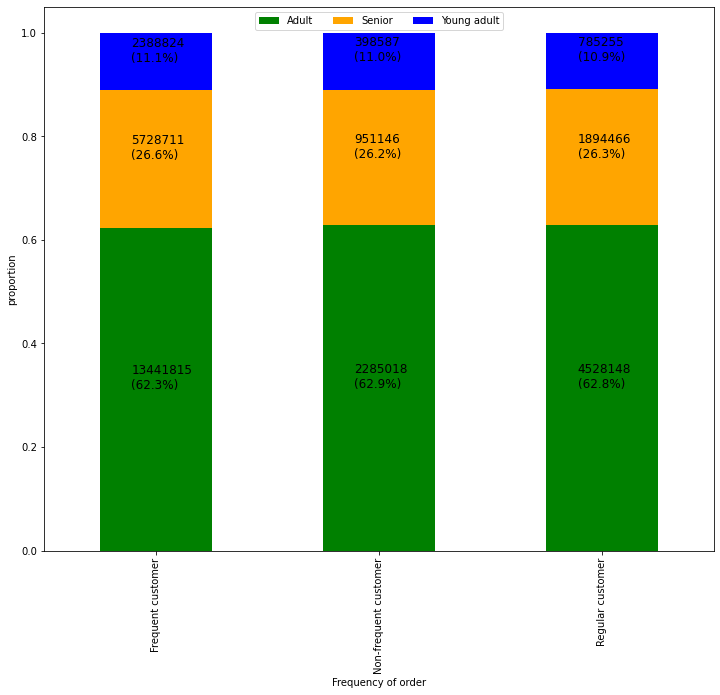

In [86]:
#plotting chart
age_order_frequency_chart=age_order_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['green','orange','blue'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("Frequency of order")


for n, y in enumerate([*age_order_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_order_frequency.loc[y],
                                         age_order_frequency_labels.loc[y],
                                          age_order_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

###### chart distribution of customers' income to frequency of order

In [87]:
# 100% stacked bar chart for income distribution across frequency of users
#create crosstab for income and frequency_flag

income_order_frequency = pd.crosstab(index=ords_prods_cus['order_frequency_flag'], columns=ords_prods_cus['income_flag'], normalize="index")

#creating cross tab to display labels

income_order_frequency_labels = pd.crosstab(index=ords_prods_cus['order_frequency_flag'],columns=ords_prods_cus['income_flag'])

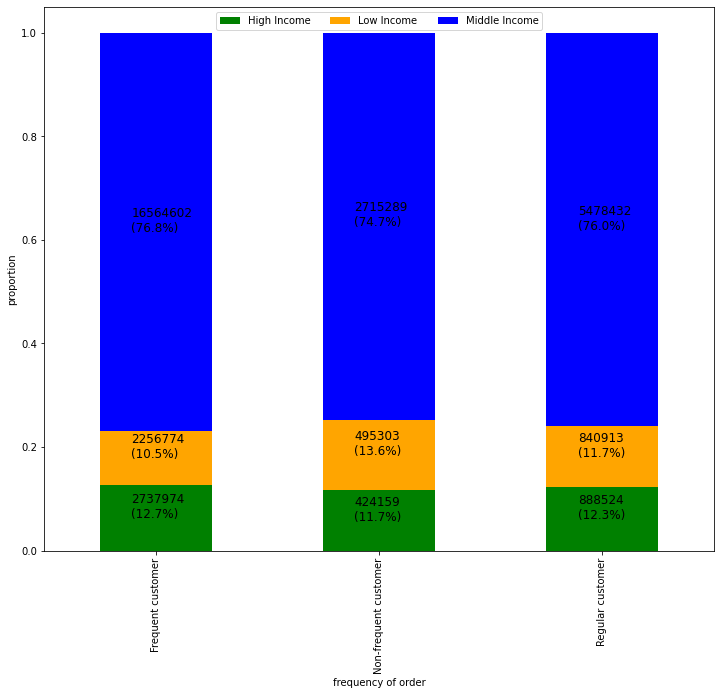

In [88]:
#plotting chart
income_order_frequency_chart=income_order_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['green','orange','blue'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("frequency of order")


for n, y in enumerate([*income_order_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_order_frequency.loc[y],
                                         income_order_frequency_labels.loc[y],
                                          income_order_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

###### chart distribution of customers'  marital status to frequency of order

In [89]:
# 100% stacked bar chart for marital  statusdistribution across frequency of users
#create crosstab for marital status and frequency_flag

marital_order_frequency = pd.crosstab(index=ords_prods_cus['order_frequency_flag'], columns=ords_prods_cus['marital_status'], normalize="index")

#creating cross tab to display labels

marital_order_frequency_labels = pd.crosstab(index=ords_prods_cus['order_frequency_flag'],columns=ords_prods_cus['marital_status'])

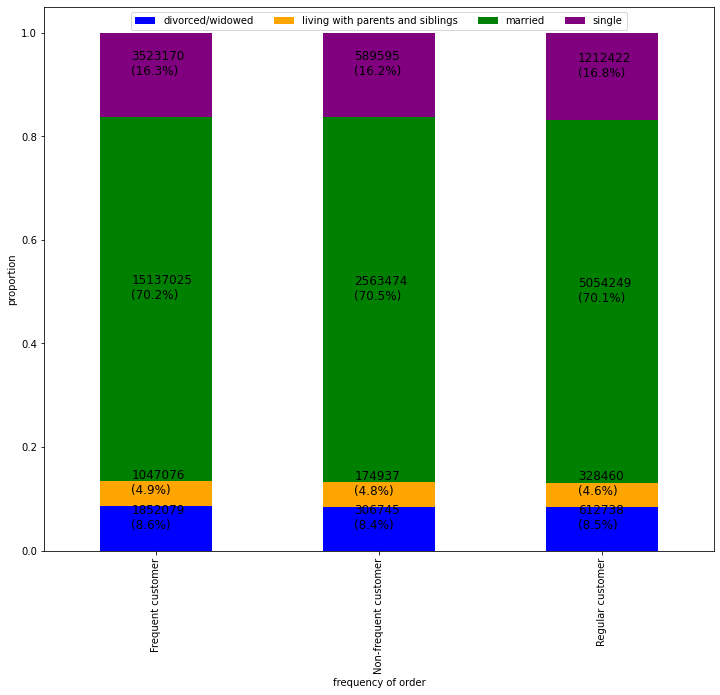

In [90]:
#plotting chart
marital_order_frequency_chart=marital_order_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['blue','orange','green','purple'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("frequency of order")


for n, y in enumerate([*marital_order_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(marital_order_frequency.loc[y],
                                         marital_order_frequency_labels.loc[y],
                                          marital_order_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

###### chart distribution of customers' dependents status to frequency of order

In [91]:
# 100% stacked bar chart for dependents status distribution across frequency of users
#create crosstab for dependents status and frequency_flag

dep_order_frequency = pd.crosstab(index=ords_prods_cus['order_frequency_flag'], columns=ords_prods_cus['dependents_flag'], normalize="index")

#creating cross tab to display labels

dep_order_frequency_labels = pd.crosstab(index=ords_prods_cus['order_frequency_flag'],columns=ords_prods_cus['dependents_flag'])

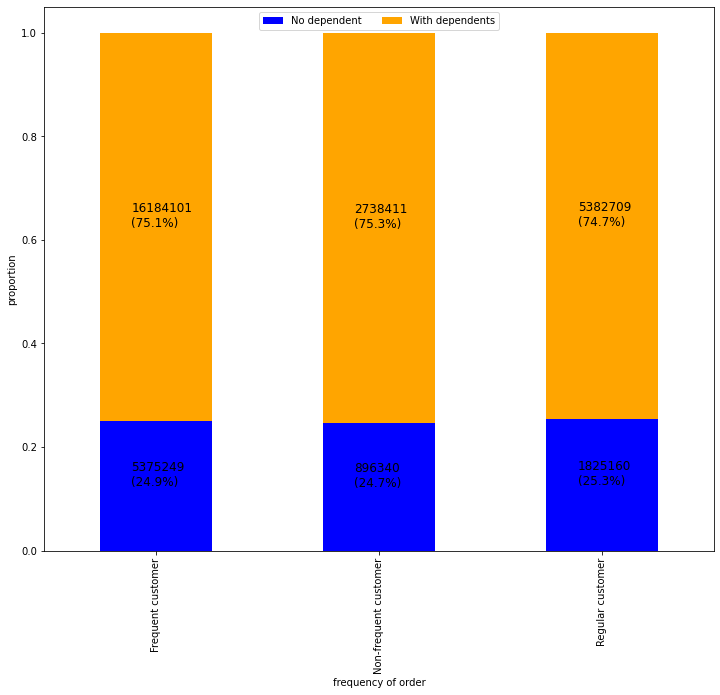

In [92]:
#plotting chart
dep_order_frequency_chart=dep_order_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['blue','orange'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("frequency of order")


for n, y in enumerate([*dep_order_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(dep_order_frequency.loc[y],
                                         dep_order_frequency_labels.loc[y],
                                          dep_order_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

###### distribution of babies and international goods to order frequency

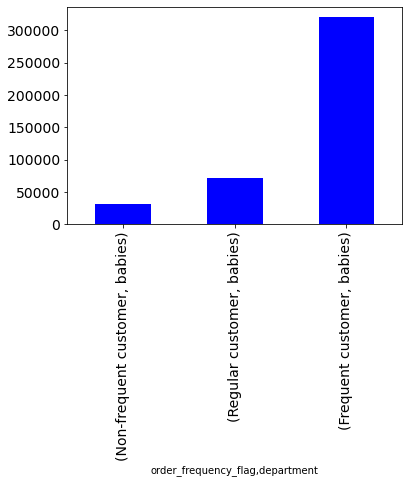

In [93]:
# Bar chart of babies goods distribution across US region
babies_freq_bar=parents.groupby('order_frequency_flag')['department'].value_counts().sort_values().plot.bar(color=['blue'],
                                                                           fontsize=14)

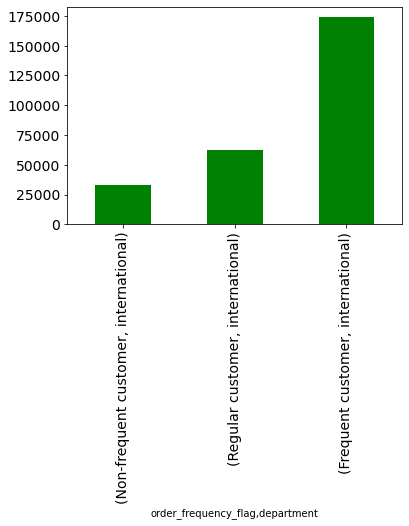

In [94]:
# Bar chart of international goods distribution across US region
international_freq_bar=Immigrants.groupby('order_frequency_flag')['department'].value_counts().sort_values().plot.bar(color=['green'],
                                                                           fontsize=14)

######  Exporting distribution of customers profiles to order frequency

In [95]:
# Export age_order_frequency_chart
age_order_frequency_chart.figure.savefig(os.path.join(path, '04 Analysis','visualizations','age_order_frequency_chart.png'))

# Export income_order_frequency_chart
income_order_frequency_chart.figure.savefig(os.path.join(path, '04 Analysis','visualizations','income_order_frequency_chart.png'))

# Export marital_order_frequency_chart
marital_order_frequency_chart.figure.savefig(os.path.join(path, '04 Analysis','visualizations','marital_order_frequency_chart.png'))

# Export dep_order_frequency_chart
dep_order_frequency_chart.figure.savefig(os.path.join(path, '04 Analysis','visualizations','dep_order_frequency_chart.png'))

# Export babies_frequency_bar
babies_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','babies_frequency_bar.png'))

# Export international_frequency_bar
international_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','international_freq_bar.png'))

### 10b. Frequency of product orders visualization

In [96]:
#defining function to show labels on charts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

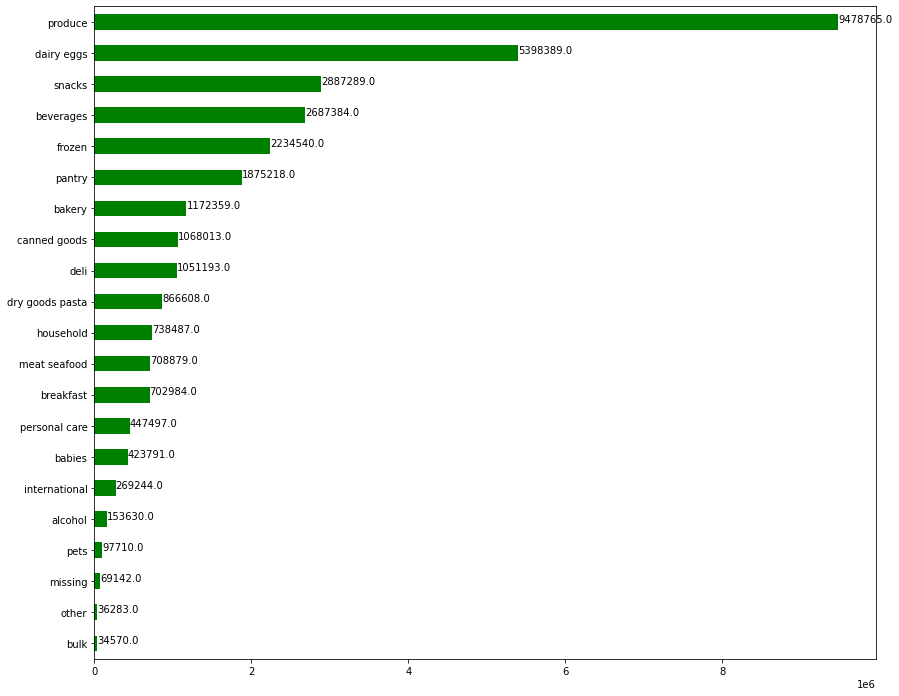

In [97]:
# bar chart showing the orders made for each department
department_bar=ords_prods_cus.department.value_counts().sort_values().plot(kind = 'barh',color=['green'],figsize=[14,12])
show_values(department_bar, "h", space=0)

### 10c. Customers' loyalty and spender visualization

In [98]:
#distribution of customer loyalty
#creating subset with userid and loyalty columns
users_loyalty=ords_prods_cus[['user_id','loyalty_flag']]
#removing duplicate values
users_loyalty_unique=users_loyalty.drop_duplicates()
#checking frequency of loyalty_flag
users_loyalty_unique['loyalty_flag'].value_counts()

New customer        111529
Regular customer     76864
Loyal customer       17017
Name: loyalty_flag, dtype: int64

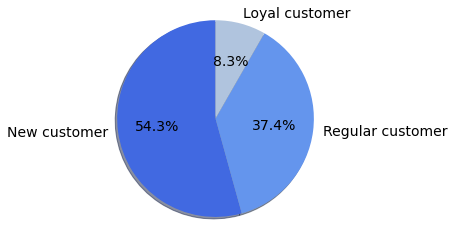

In [99]:
# pie chart for loyalty flag
labels = 'New customer', 'Regular customer', 'Loyal customer'
sizes = users_loyalty_unique['loyalty_flag'].value_counts()
colors = ['royalblue','cornflowerblue','lightsteelblue']
textprops = {"fontsize":14}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.show()

In [100]:
#distribution of spender
#creating subset with userid and spender columns
users_prices=ords_prods_cus[['user_id','price_range_loc']]
#removing duplicate values
users_prices_unique=users_prices.drop_duplicates()
#checking frequency of spender_flag
users_prices_unique['price_range_loc'].value_counts()

Mid-range product     205196
Low-range product     204071
High-range product     91013
Name: price_range_loc, dtype: int64

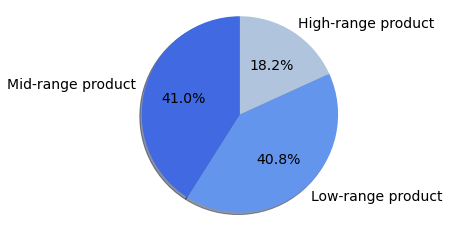

In [101]:
# pie chart for price range
labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = users_prices_unique['price_range_loc'].value_counts()
colors = ['royalblue','cornflowerblue','lightsteelblue']
textprops = {"fontsize":14}

Price_range_fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.show()

In [102]:
#Export visuals
# Export department_bar
department_bar.figure.savefig(os.path.join(path, '04 Analysis','visualizations','department_bar.png'))

# Export loyal_flag pie chart
loyal.figure.savefig(os.path.join(path, '04 Analysis','visualizations','loyal.png'))

# Export Price_range_loc pie chart
Price_range_fig.figure.savefig(os.path.join(path, '04 Analysis','visualizations','Price_range_fig.png'))

In [103]:
# Export final dataset
ords_prods_cus.to_pickle(os.path.join(path,'02 Data','Prepared Data(cleaned)','Final datasets.pkl'))